#### Create probabilities of tasks over iterations : Analysis of beta 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

In [3]:
iters= 469*50
tasks= 5

def create_task_probs_mod( task_id, beta):
    if beta <= 1:
        peak_start = int((task_id/tasks)*iters)
        peak_end = int(((task_id + 1) / tasks)*iters)
        start = peak_start
        end = peak_end
    else:
        # print(f" iters : {iters}") # 46900
        start = max(int(((beta*task_id - 1)*iters)/(beta*tasks)), 0)
        peak_start = int(((beta*task_id + 1)*iters)/(beta*tasks)) 
        peak_end = int(((beta * task_id + (beta - 1)) * iters) / (beta * tasks))
        end = min(int(((beta * task_id + (beta + 1)) * iters) / (beta * tasks)), iters) 

    return start, peak_start, peak_end, end

In [4]:
# iters= 46900
# tasks= 10

# def _get_linear_line(start, end, direction="up"):
#     if direction == "up":
#         return torch.FloatTensor([(i - start)/(end-start) for i in range(start, end)])
#     return torch.FloatTensor([1 - ((i - start) / (end - start)) for i in range(start, end)])


# def _create_task_probs_(task_id, beta=3):
#     if beta <= 1:
#         peak_start = int((task_id/tasks)*iters)
#         peak_end = int(((task_id + 1) / tasks)*iters)
#         start = peak_start
#         end = peak_end
#     else:
#         start = max(int(((beta*task_id - 1)*iters)/(beta*tasks)), 0)
#         peak_start = int(((beta*task_id + 1)*iters)/(beta*tasks))
#         peak_end = int(((beta * task_id + (beta - 1)) * iters) / (beta * tasks))
#         end = min(int(((beta * task_id + (beta + 1)) * iters) / (beta * tasks)), iters)

#     #This is a probability dist for each task across iterations
#     probs = torch.zeros(iters, dtype=torch.float)

#     if task_id == 0:
#         probs[start:peak_start].add_(1)
#     else:
#         probs[start:peak_start] = _get_linear_line(start, peak_start, direction="up")
#     probs[peak_start:peak_end].add_(1)
#     if task_id == tasks - 1:
#         probs[peak_end:end].add_(1)
#     else:
#         probs[peak_end:end] = _get_linear_line(peak_end, end, direction="down")
  

#     return probs, end

In [5]:
num_of_permutations = 9
round_end_iters = [create_task_probs_mod(task_id, beta = 4)[1] for task_id in range(num_of_permutations+1)]
round_end_iters

[1172, 5862, 10552, 15242, 19932, 24622, 29312, 34002, 38692, 43382]

In [15]:


def plot_tasks_data_with_beta(tasks_lst, beta):
    task_ids = np.arange(len(tasks_lst))
    fig, ax = plt.subplots(figsize=(7, 4))
    colors = ['skyblue', 'green', 'orange']

    # (pt), w, h

    for i, (start, peak_start, peak_end, end) in enumerate(tasks_lst):

        ax.add_patch(patches.Rectangle((start, i), peak_start - start, 0.8, edgecolor='black', facecolor=colors[0], label='Start to Peak Start' if i == 0 else ""))
        ax.add_patch(patches.Rectangle((peak_start, i), peak_end - peak_start, 0.8, edgecolor='black', facecolor=colors[1], label='Peak Period' if i == 0 else ""))
        ax.add_patch(patches.Rectangle((peak_end, i), end - peak_end, 0.8, edgecolor='black', facecolor=colors[2], label='Peak End to End' if i == 0 else ""))


    ax.set_xlabel('Iterations')
    ax.set_ylabel('Task ID')
    # ax.set_title(f'Overlap Between Tasks for Beta={beta} Over 46900 Iterations')
    ax.set_title(f'Task Transition over iterations')
    ax.set_yticks(task_ids + 0.4)
    ax.set_yticklabels(task_ids)
    # ax.set_xlim(0, 46900 + 1000)
    ax.set_xlim(0, 469*50 )
    ax.set_ylim(0, len(task_ids) + 0.5)  
    ax.legend()

    plt.grid(True)
    plt.show()

In [7]:
round_end_iters

[1172, 5862, 10552, 15242, 19932, 24622, 29312, 34002, 38692, 43382]

In [7]:
beta = 1
task_ids = np.arange(10)
print(f" Current beta : {beta}")
tasks_lst_beta_1 = []
for task_id in task_ids:
    start, peak_start, peak_end, end = create_task_probs_mod(task_id=task_id, beta= beta)
    tasks_lst_beta_1.append((start, peak_start, peak_end, end))
    print(f" start {start}, peak_start { peak_start}, peak_end {peak_end}, end {end} overall existence {end-start} peak peroid {peak_end-peak_start}")


 Current beta : 1
 start 0, peak_start 0, peak_end 4690, end 4690 overall existence 4690 peak peroid 4690
 start 4690, peak_start 4690, peak_end 9380, end 9380 overall existence 4690 peak peroid 4690
 start 9380, peak_start 9380, peak_end 14070, end 14070 overall existence 4690 peak peroid 4690
 start 14070, peak_start 14070, peak_end 18760, end 18760 overall existence 4690 peak peroid 4690
 start 18760, peak_start 18760, peak_end 23450, end 23450 overall existence 4690 peak peroid 4690
 start 23450, peak_start 23450, peak_end 28140, end 28140 overall existence 4690 peak peroid 4690
 start 28140, peak_start 28140, peak_end 32830, end 32830 overall existence 4690 peak peroid 4690
 start 32830, peak_start 32830, peak_end 37520, end 37520 overall existence 4690 peak peroid 4690
 start 37520, peak_start 37520, peak_end 42210, end 42210 overall existence 4690 peak peroid 4690
 start 42210, peak_start 42210, peak_end 46900, end 46900 overall existence 4690 peak peroid 4690


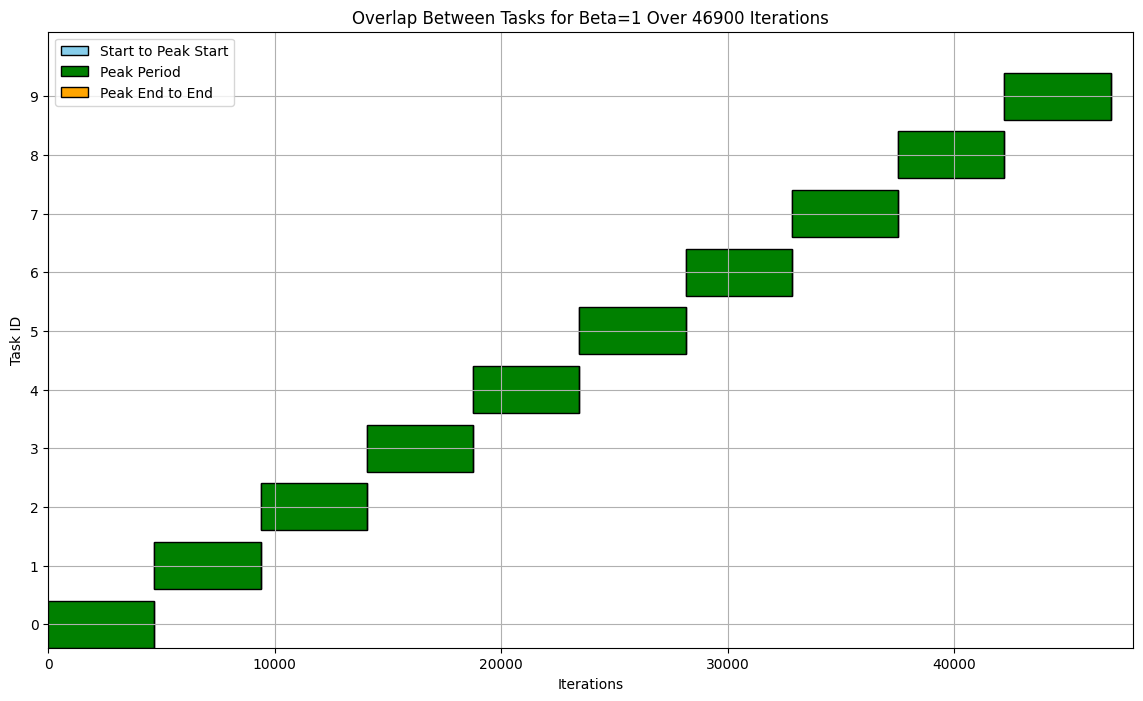

In [8]:
plot_tasks_data_with_beta(tasks_lst_beta_1, 1)  

+ beta = 2

In [9]:
beta = 2
task_ids = np.arange(10)
print(f" Current beta : {beta}")
tasks_lst_beta_2 = []
for task_id in task_ids:
    start, peak_start, peak_end, end = create_task_probs_mod(task_id=task_id, beta= beta)
    tasks_lst_beta_2.append((start, peak_start, peak_end, end))
    print(f" start {start}, peak_start { peak_start}, peak_end {peak_end}, end {end} overall existence {end-start} peak peroid {peak_end-peak_start}")


 Current beta : 2
 start 0, peak_start 2345, peak_end 2345, end 7035 overall existence 7035 peak peroid 0
 start 2345, peak_start 7035, peak_end 7035, end 11725 overall existence 9380 peak peroid 0
 start 7035, peak_start 11725, peak_end 11725, end 16415 overall existence 9380 peak peroid 0
 start 11725, peak_start 16415, peak_end 16415, end 21105 overall existence 9380 peak peroid 0
 start 16415, peak_start 21105, peak_end 21105, end 25795 overall existence 9380 peak peroid 0
 start 21105, peak_start 25795, peak_end 25795, end 30485 overall existence 9380 peak peroid 0
 start 25795, peak_start 30485, peak_end 30485, end 35175 overall existence 9380 peak peroid 0
 start 30485, peak_start 35175, peak_end 35175, end 39865 overall existence 9380 peak peroid 0
 start 35175, peak_start 39865, peak_end 39865, end 44555 overall existence 9380 peak peroid 0
 start 39865, peak_start 44555, peak_end 44555, end 46900 overall existence 7035 peak peroid 0


+ **start to peak_start**:  start is that particular iteration where probability of that task starts (prob starts and gradually increases from 0)
+ **peak period** : over this period of iterations, task has no overlap with other tasks (prob = 1)
+ **peak_end to end** : probability of task gradually decreasing from here and end it becomes zero

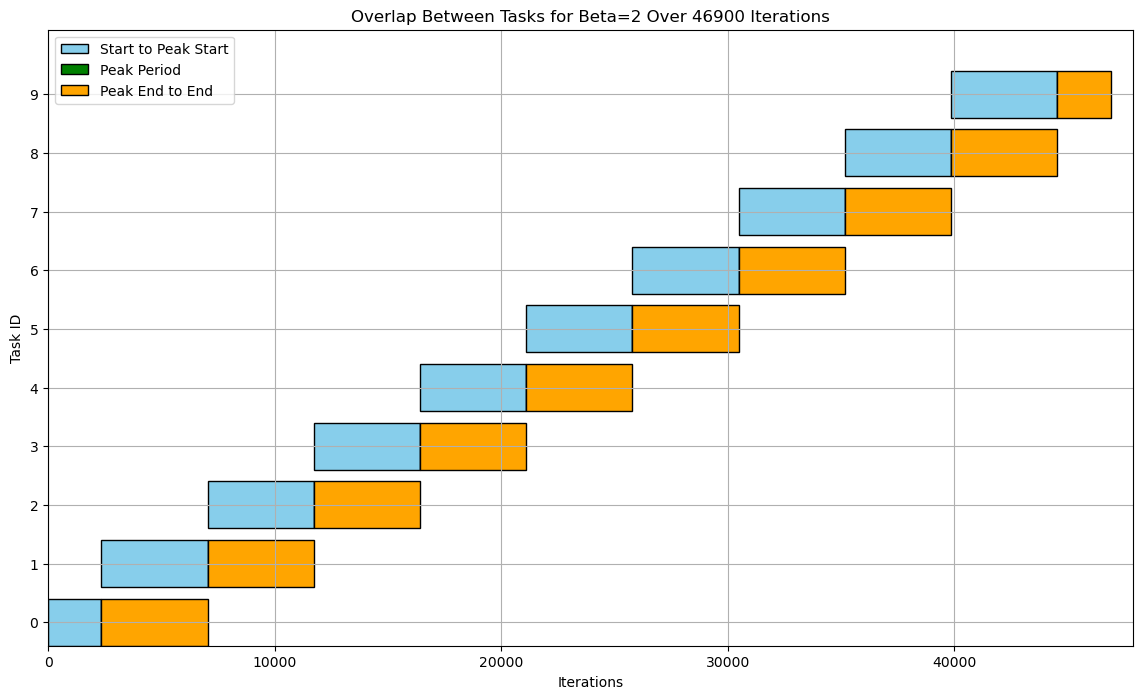

In [44]:
plot_tasks_data_with_beta(tasks_lst_beta_2, 2)  

+ beta = 3

In [45]:
beta = 3
task_ids = np.arange(10)
tasks_lst_beta_3 = []
print(f" Current beta : {beta}")
for task_id in task_ids:
    start, peak_start, peak_end, end = create_task_probs_mod(task_id=task_id, beta= beta)
    tasks_lst_beta_3.append((start, peak_start, peak_end, end))
    print(f" start {start}, peak_start { peak_start}, peak_end {peak_end}, end {end} overall existence {end-start} peak peroid {peak_end-peak_start}")


 Current beta : 3
 start 0, peak_start 1563, peak_end 3126, end 6253 overall existence 6253 peak peroid 1563
 start 3126, peak_start 6253, peak_end 7816, end 10943 overall existence 7817 peak peroid 1563
 start 7816, peak_start 10943, peak_end 12506, end 15633 overall existence 7817 peak peroid 1563
 start 12506, peak_start 15633, peak_end 17196, end 20323 overall existence 7817 peak peroid 1563
 start 17196, peak_start 20323, peak_end 21886, end 25013 overall existence 7817 peak peroid 1563
 start 21886, peak_start 25013, peak_end 26576, end 29703 overall existence 7817 peak peroid 1563
 start 26576, peak_start 29703, peak_end 31266, end 34393 overall existence 7817 peak peroid 1563
 start 31266, peak_start 34393, peak_end 35956, end 39083 overall existence 7817 peak peroid 1563
 start 35956, peak_start 39083, peak_end 40646, end 43773 overall existence 7817 peak peroid 1563
 start 40646, peak_start 43773, peak_end 45336, end 46900 overall existence 6254 peak peroid 1563


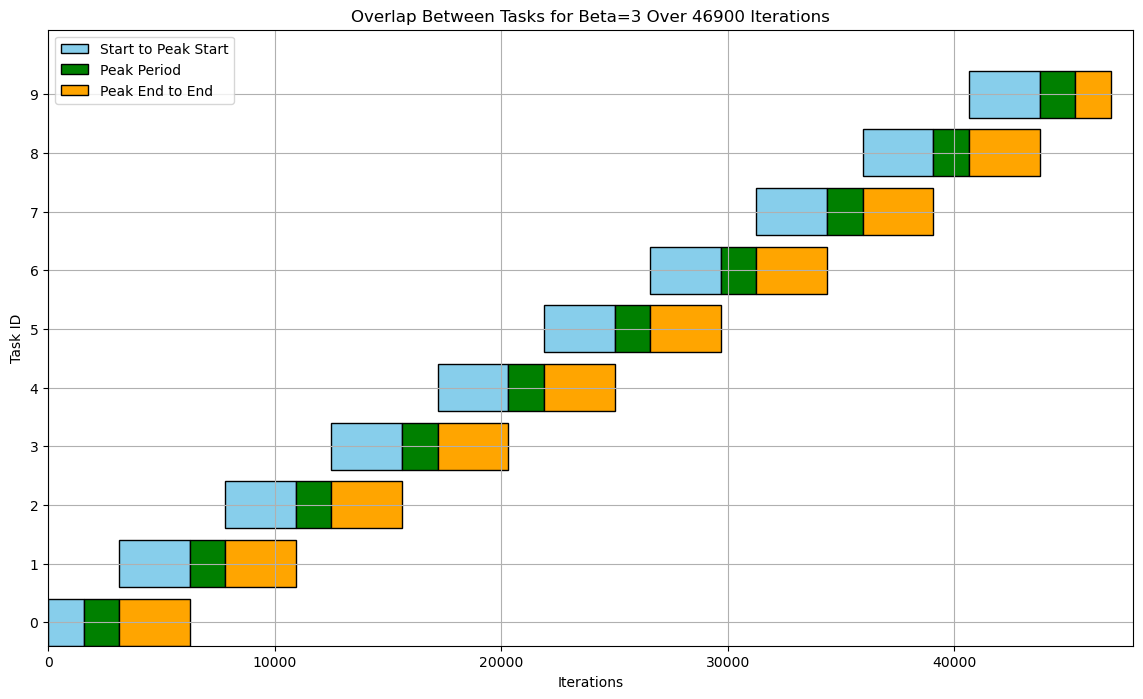

In [46]:
plot_tasks_data_with_beta(tasks_lst_beta_3, 3)

+ beta = 4

In [16]:
beta = 4
task_ids = np.arange(5)
print(f" Current beta : {beta}")

tasks_lst_beta_4 = []
for task_id in task_ids:
    start, peak_start, peak_end, end = create_task_probs_mod(task_id=task_id, beta= beta)
    tasks_lst_beta_4.append((start, peak_start, peak_end, end))
    print(f" start {start}, peak_start { peak_start}, peak_end {peak_end}, end {end} overall existence {end-start} peak peroid {peak_end-peak_start}")


 Current beta : 4
 start 0, peak_start 1172, peak_end 3517, end 5862 overall existence 5862 peak peroid 2345
 start 3517, peak_start 5862, peak_end 8207, end 10552 overall existence 7035 peak peroid 2345
 start 8207, peak_start 10552, peak_end 12897, end 15242 overall existence 7035 peak peroid 2345
 start 12897, peak_start 15242, peak_end 17587, end 19932 overall existence 7035 peak peroid 2345
 start 17587, peak_start 19932, peak_end 22277, end 23450 overall existence 5863 peak peroid 2345


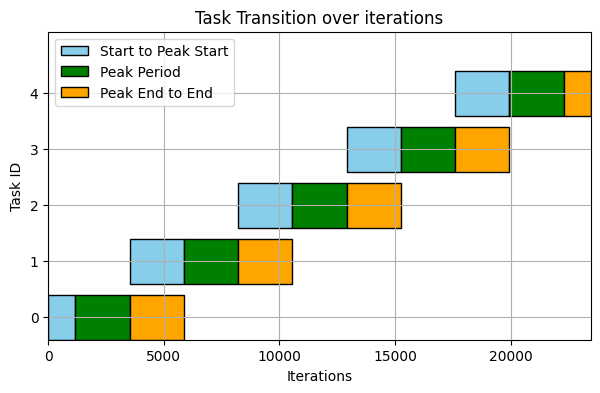

In [17]:
plot_tasks_data_with_beta(tasks_lst_beta_4, 4) 

+ beta = 5

In [49]:
beta = 5
task_ids = np.arange(10)
print(f" Current beta : {beta}")

tasks_lst_beta_5 = []
for task_id in task_ids:
    start, peak_start, peak_end, end = create_task_probs_mod(task_id=task_id, beta= beta)
    tasks_lst_beta_5.append((start, peak_start, peak_end, end))
    print(f" start {start}, peak_start { peak_start}, peak_end {peak_end}, end {end} overall existence {end-start} peak peroid {peak_end-peak_start}")


 Current beta : 5
 start 0, peak_start 938, peak_end 3752, end 5628 overall existence 5628 peak peroid 2814
 start 3752, peak_start 5628, peak_end 8442, end 10318 overall existence 6566 peak peroid 2814
 start 8442, peak_start 10318, peak_end 13132, end 15008 overall existence 6566 peak peroid 2814
 start 13132, peak_start 15008, peak_end 17822, end 19698 overall existence 6566 peak peroid 2814
 start 17822, peak_start 19698, peak_end 22512, end 24388 overall existence 6566 peak peroid 2814
 start 22512, peak_start 24388, peak_end 27202, end 29078 overall existence 6566 peak peroid 2814
 start 27202, peak_start 29078, peak_end 31892, end 33768 overall existence 6566 peak peroid 2814
 start 31892, peak_start 33768, peak_end 36582, end 38458 overall existence 6566 peak peroid 2814
 start 36582, peak_start 38458, peak_end 41272, end 43148 overall existence 6566 peak peroid 2814
 start 41272, peak_start 43148, peak_end 45962, end 46900 overall existence 5628 peak peroid 2814


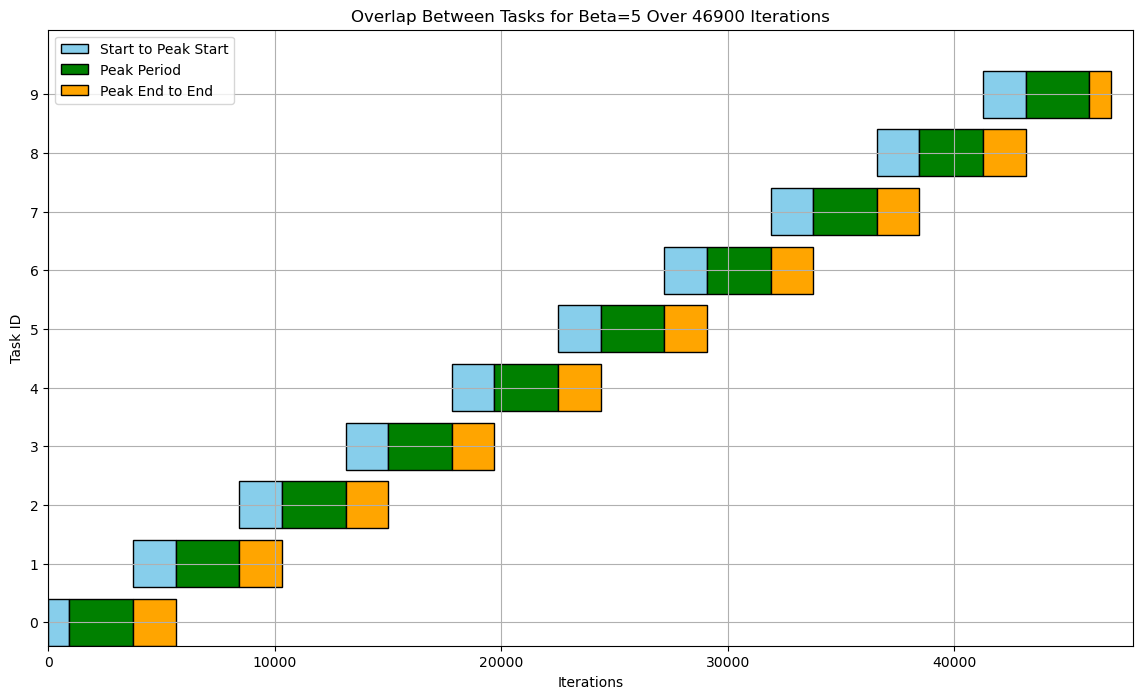

In [50]:
plot_tasks_data_with_beta(tasks_lst_beta_5, 5) 

### Conclusions

+ **Horizantal** : For every task, we have a row probability vector of size 46900
+ **Vertical** : For every iteration, we have column probability vector of size 10 (all 10 tasks)

 As beta increases,

+  task existence(duration where the task have non-zero probabilities) will decrease
+  peak period will increase
+  overlap period(duration other than task is at peak, overlap withother tasks) will decrease

In [1]:
9 or None

9

+ python main.py --logname continuous_permuted_mnist_10tasks --num_workers 1 --test_freq 10 --permute_seed 2019 --seed 2019 --iterations_per_virtual_epc 469 --contpermuted_beta 4 --num_of_permutations $(( 10 - 1 )) --optimizer bgd --nn_arch cnn_model_from_ewc --dataset ds_padded_cont_permuted_mnist --num_epochs $(( 10 * 10)) --std_init 0.06 --batch_size 128 --results_dir res --train_mc_iters 10 --inference_mc --test_mc_iters 10 --inference_map --inference_committee --committee_size 10 --inference_aggsoftmax --inference_initstd --desc BGD on continuous permuted mnist --n_classes 10 --n_tasks 10

In [100]:
python main.py --logname continuous_permuted_mnist_10tasks --num_workers 1 --test_freq 10 --permute_seed 2019 --seed 2019 --iterations_per_virtual_epc 469 --contpermuted_beta 4 --num_of_permutations $(( 10 - 1 )) --optimizer bgd --nn_arch cnn_model_from_ewc --dataset ds_padded_cont_permuted_mnist --num_epochs $(( 10 * 10)) --std_init 0.06 --batch_size 128 --results_dir res --train_mc_iters 10 --inference_mc --test_mc_iters 10 --inference_map --inference_committee --committee_size 10 --inference_aggsoftmax --inference_initstd --desc BGD on continuous permuted mnist --n_classes 10 --n_tasks 10

+ Only Softmax inference method

+ python main.py --logname continuous_permuted_mnist_10tasks --num_workers 1 --test_freq 10 --permute_seed 2019 --seed 2019 --iterations_per_virtual_epc 469 --contpermuted_beta 4 --num_of_permutations $(( 10 - 1 )) --optimizer bgd --nn_arch cnn_model_from_ewc --dataset ds_padded_cont_permuted_mnist --num_epochs $(( 10 * 10)) --std_init 0.06 --batch_size 128 --results_dir res --train_mc_iters 10 --test_mc_iters 10 --inference_aggsoftmax --committee_size 10 --n_classes 10 --n_tasks 10


In [ ]:
python main.py --logname continuous_permuted_mnist_10tasks --num_workers 1 --test_freq 10 --permute_seed 2019 --seed 2019 --iterations_per_virtual_epc 469 --contpermuted_beta 4 --num_of_permutations $(( 10 - 1 )) --optimizer bgd --nn_arch cnn_model_from_ewc --dataset ds_padded_cont_permuted_mnist --num_epochs $(( 10 * 10)) --std_init 0.06 --batch_size 128 --results_dir res --train_mc_iters 10 --test_mc_iters 10 --inference_aggsoftmax --committee_size 10 --n_classes 10 --n_tasks 10

+ Training

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MNIST_CNN(nn.Module):
  """
  CNN with two 5x5 convolution lauers(the first with 32 channels, second with 64,
  each followed with 2x2 max pooling), a fully connected layer with 512 uunits and 
  ReLu activation, and the final Softmax output layer

  Total Expected Params: 1,663,370
  """
  def __init__(self,n_classes=10,n_tasks=3,**kwargs):
    super(MNIST_CNN, self).__init__()

    self.num_classes = n_classes
    self.num_tasks = n_tasks
    self.ds_idx = 0

    self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
    
    self.pool = nn.MaxPool2d(2,2)
    self.dropout = nn.Dropout(p=0.2)

    self.fc1 = nn.Linear(1024, 512)
    # self.out = nn.Linear(512, 10)
    self.last_layer = nn.ModuleList([nn.Linear(512,self.num_classes) for _ in range(self.num_tasks)])

  def set_dataset(self, ds_idx):
    self.ds_idx = ds_idx % self.num_tasks


  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.dropout(x)
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = self.last_layer[self.ds_idx](x)
    out = F.log_softmax(x, dim=1)

    return out
  
def cnn_model_from_ewc(n_classes=10,n_tasks=10,**kwargs):
  return MNIST_CNN(n_classes,n_tasks,**kwargs) 

+ Loss_avg

In [5]:
class AverageTracker:
    def __init__(self):
        self.n = 0
        self.avg = float(0)

    def reset(self):
        self.n = 0
        self.avg = float(0)
        return self

    def add(self, val, n=1):  # n-> batch_size
        breakpoint()
        if n == 0:
            return self
        self.avg = ((self.avg * self.n) / (self.n + n)) + ((float(val) * n) / (self.n + n))
        self.n += n
        return self 

In [6]:
import numpy as np

loss_avg_obj = AverageTracker()
loss_values = np.arange(5)
for value in loss_values:
    loss_avg_obj.add(value, 128)

In [7]:
loss_avg_obj.n

640

In [8]:
loss_avg_obj.avg

2.0

In [15]:
def add(val, n=1):  # n-> batch_size
    avg = float(3)
    N = 128
    if n == 0:
        return
    avg1 = ((avg * N) / (N + n)) 
    avg2 = ((float(val) * n) / (N + n))
    avg = avg1 + avg2
    n += n
    return avg1, avg2, avg

In [16]:
add(2, 128)

(1.5, 1.0, 2.5)

In [ ]:
self.probes_manager.add_data(probe_loc="post_backward_pre_optim_step",weights_grad=self.weights_grad_lst(),weights=self.weights_lst())

In [1]:
import os
import shutil

def delete_pycache(directory):
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            if dir_name == "__pycache__":
                pycache_dir = os.path.join(root, dir_name)
                print(f"Deleting {pycache_dir}")
                try:
                    shutil.rmtree(pycache_dir)
                    print(f"Deleted {pycache_dir}")
                except OSError as e:
                    print(f"Error deleting {pycache_dir}: {e}")

if __name__ == "__main__":
    directory = input("Enter the directory path: ")
    delete_pycache(directory)


Deleting /home/gayam22139/BGD_FL/bgd_new/__pycache__
Deleted /home/gayam22139/BGD_FL/bgd_new/__pycache__
Deleting /home/gayam22139/BGD_FL/bgd_new/models/__pycache__
Deleted /home/gayam22139/BGD_FL/bgd_new/models/__pycache__
Deleting /home/gayam22139/BGD_FL/bgd_new/nn_utils/__pycache__
Deleted /home/gayam22139/BGD_FL/bgd_new/nn_utils/__pycache__
Deleting /home/gayam22139/BGD_FL/bgd_new/probes_lib/__pycache__
Deleted /home/gayam22139/BGD_FL/bgd_new/probes_lib/__pycache__
Deleting /home/gayam22139/BGD_FL/bgd_new/optimizers_lib/__pycache__
Deleted /home/gayam22139/BGD_FL/bgd_new/optimizers_lib/__pycache__
Deleting /home/gayam22139/BGD_FL/bgd_new/utils/__pycache__
Deleted /home/gayam22139/BGD_FL/bgd_new/utils/__pycache__


+ Dataset

In [4]:
import torchvision.transforms as transforms
import torchvision
import torch
import numpy as np
import os
import codecs
from torch.distributions.categorical import Categorical
import torch.utils.data as data

import random
import time

/home/gayam22139/miniconda3/envs/bml_project/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [5]:
class Permutation(torch.utils.data.Dataset):
    """
    A dataset wrapper that permute the position of features
    """
    def __init__(self, dataset, permute_idx, target_offset):
        super(Permutation,self).__init__()
        self.dataset = dataset
        self.permute_idx = permute_idx
        self.target_offset = target_offset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        img, target = self.dataset[index]
        target = target + self.target_offset
        shape = img.size()
        img = img.view(-1)[self.permute_idx].view(shape)
        return img, target

In [6]:
def _get_linear_line(start, end, direction="up"):
    if direction == "up":
        return torch.FloatTensor([(i - start)/(end-start) for i in range(start, end)])
    return torch.FloatTensor([1 - ((i - start) / (end - start)) for i in range(start, end)])


def _create_task_probs(iters, tasks, task_id, beta=3):
    if beta <= 1:
        peak_start = int((task_id/tasks)*iters)
        peak_end = int(((task_id + 1) / tasks)*iters)
        start = peak_start
        end = peak_end
    else:
        start = max(int(((beta*task_id - 1)*iters)/(beta*tasks)), 0)
        peak_start = int(((beta*task_id + 1)*iters)/(beta*tasks))
        peak_end = int(((beta * task_id + (beta - 1)) * iters) / (beta * tasks))
        end = min(int(((beta * task_id + (beta + 1)) * iters) / (beta * tasks)), iters)

    #This is a probability dist for each task across iterations
    probs = torch.zeros(iters, dtype=torch.float)

    if task_id == 0:
        probs[start:peak_start].add_(1)
    else:
        probs[start:peak_start] = _get_linear_line(start, peak_start, direction="up")
    probs[peak_start:peak_end].add_(1)
    if task_id == tasks - 1:
        probs[peak_end:end].add_(1)
    else:
        probs[peak_end:end] = _get_linear_line(peak_end, end, direction="down")
    
    with open('probs.txt','w') as f:
        f.write(str(probs.numpy().tolist()))

    return probs

In [7]:
class ContinuousMultinomialSampler(torch.utils.data.Sampler):
    r"""Samples elements randomly. If without replacement, then sample from a shuffled dataset.
    If with replacement, then user can specify ``num_samples`` to draw.
    self.tasks_probs_over_iterations is the probabilities of tasks over iterations.
    self.samples_distribution_over_time is the actual distribution of samples over iterations
                                            (the result of sampling from self.tasks_probs_over_iterations).
    Arguments:
        data_source (Dataset): dataset to sample from
        num_samples (int): number of samples to draw, default=len(dataset)
        replacement (bool): samples are drawn with replacement if ``True``, default=False
    """

    def __init__(self, data_source, samples_in_batch=128, num_of_batches=69, tasks_samples_indices=None,
                 tasks_probs_over_iterations=None):
        self.data_source = data_source
        assert tasks_samples_indices is not None, "Must provide tasks_samples_indices - a list of tensors," \
                                                  "each item in the list corrosponds to a task, each item of the " \
                                                  "tensor corrosponds to index of sample of this task"
        self.tasks_samples_indices = tasks_samples_indices
        self.num_of_tasks = len(self.tasks_samples_indices)
        assert tasks_probs_over_iterations is not None, "Must provide tasks_probs_over_iterations - a list of " \
                                                         "probs per iteration"
        assert all([isinstance(probs, torch.Tensor) and len(probs) == self.num_of_tasks for
                    probs in tasks_probs_over_iterations]), "All probs must be tensors of len" \
                                                              + str(self.num_of_tasks) + ", first tensor type is " \
                                                              + str(type(tasks_probs_over_iterations[0])) + ", and " \
                                                              " len is " + str(len(tasks_probs_over_iterations[0]))
        self.tasks_probs_over_iterations = tasks_probs_over_iterations
        self.current_iteration = 0

        self.samples_in_batch = samples_in_batch
        self.num_of_batches = num_of_batches

        # Create the samples_distribution_over_time
        self.samples_distribution_over_time = [[] for _ in range(self.num_of_tasks)]
        self.iter_indices_per_iteration = []

        if not isinstance(self.samples_in_batch, int) or self.samples_in_batch <= 0:
            raise ValueError("num_samples should be a positive integeral "
                             "value, but got num_samples={}".format(self.samples_in_batch))

    def generate_iters_indices(self, num_of_iters):
        from_iter = len(self.iter_indices_per_iteration)
        for iter_num in range(from_iter, from_iter+num_of_iters):

            # Get random number of samples per task (according to iteration distribution)
            tsks = Categorical(probs=self.tasks_probs_over_iterations[iter_num]).sample(torch.Size([self.samples_in_batch]))
            # Generate samples indices for iter_num
            iter_indices = torch.zeros(0, dtype=torch.int32)
            for task_idx in range(self.num_of_tasks):
                if self.tasks_probs_over_iterations[iter_num][task_idx] > 0:
                    num_samples_from_task = (tsks == task_idx).sum().item()
                    self.samples_distribution_over_time[task_idx].append(num_samples_from_task)
                    # Randomize indices for each task (to allow creation of random task batch)
                    tasks_inner_permute = np.random.permutation(len(self.tasks_samples_indices[task_idx]))
                    rand_indices_of_task = tasks_inner_permute[:num_samples_from_task]
                    iter_indices = torch.cat([iter_indices, self.tasks_samples_indices[task_idx][rand_indices_of_task]])
                else:
                    self.samples_distribution_over_time[task_idx].append(0)
            self.iter_indices_per_iteration.append(iter_indices.tolist())

    def __iter__(self):
        self.generate_iters_indices(self.num_of_batches)
        self.current_iteration += self.num_of_batches
        return iter([item for sublist in self.iter_indices_per_iteration[self.current_iteration - self.num_of_batches:self.current_iteration] for item in sublist])

    def __len__(self):
        return len(self.data_source) #self.samples_in_batch

In [8]:

class DatasetsLoaders:
    def __init__(self, dataset, batch_size=4, num_workers=4, pin_memory=True, **kwargs):
        # print("kwargs in datasetloaders - ",kwargs)
        self.dataset_name = dataset
        self.valid_loader = None
        self.num_workers = num_workers
        if self.num_workers is None:
            self.num_workers = 4

        self.random_erasing = kwargs.get("random_erasing", False)
        self.reduce_classes = kwargs.get("reduce_classes", None)
        self.permute = kwargs.get("permute", False)
        self.target_offset = kwargs.get("target_offset", 0)

        pin_memory = pin_memory if torch.cuda.is_available() else False
        self.batch_size = batch_size

        if dataset == "CONTPERMUTEDPADDEDMNIST" or dataset == "CONTPERMUTEDMNIST":

                # if dataset == "CONTPERMUTEDPADDEDMNIST":
                #     transform = transforms.Compose(
                #         [transforms.Pad(2, fill=0, padding_mode='constant'),
                #         transforms.ToTensor(),
                #         transforms.Normalize(mean=(0.1000,), std=(0.2752,))])

                if dataset == "CONTPERMUTEDPADDEDMNIST":
                    transform = transforms.Compose(
                        [transforms.Pad(2, fill=0, padding_mode='constant'),
                        transforms.ToTensor()])
                
                if dataset == "CONTPERMUTEDMNIST":
                    transform = transforms.Compose(
                        [transforms.ToTensor()])

                # Original MNIST
                tasks_datasets = [torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)]
                tasks_samples_indices = [torch.tensor(range(len(tasks_datasets[0])), dtype=torch.int32)]
                total_len = len(tasks_datasets[0])
                test_loaders = [torch.utils.data.DataLoader(torchvision.datasets.MNIST(root='./data', train=False,
                                                                                    download=True, transform=transform),
                                                            batch_size=self.batch_size, shuffle=False,
                                                            num_workers=self.num_workers, pin_memory=pin_memory)]
                self.num_of_permutations = len(kwargs.get("all_permutation"))
                all_permutation = kwargs.get("all_permutation", None)
                for p_idx in range(self.num_of_permutations):
                    # Create permuation
                    permutation = all_permutation[p_idx]

                    # Add train set:
                    tasks_datasets.append(Permutation(torchvision.datasets.MNIST(root='./data', train=True,
                                                                                download=True, transform=transform),
                                                    permutation, target_offset=0))

                    tasks_samples_indices.append(torch.tensor(range(total_len,
                                                                    total_len + len(tasks_datasets[-1])
                                                                    ), dtype=torch.int32))
                    total_len += len(tasks_datasets[-1])
                    # Add test set:
                    test_set = Permutation(torchvision.datasets.MNIST(root='./data', train=False,
                                                                    download=True, transform=transform),
                                        permutation, self.target_offset)
                    test_loaders.append(torch.utils.data.DataLoader(test_set, batch_size=self.batch_size,
                                                                    shuffle=False, num_workers=self.num_workers,
                                                                    pin_memory=pin_memory))
                self.test_loader = test_loaders
                # Concat datasets
                total_iters = kwargs.get("total_iters", None)

                assert total_iters is not None
                beta = kwargs.get("contpermuted_beta", 3)
                all_datasets = torch.utils.data.ConcatDataset(tasks_datasets)

                # Create probabilities of tasks over iterations
                self.tasks_probs_over_iterations = [_create_task_probs(total_iters, self.num_of_permutations+1, task_id,
                                                                        beta=beta) for task_id in
                                                    range(self.num_of_permutations+1)]
                
                normalize_probs = torch.zeros_like(self.tasks_probs_over_iterations[0])
                for probs in self.tasks_probs_over_iterations:
                    normalize_probs.add_(probs)
                for probs in self.tasks_probs_over_iterations:
                    probs.div_(normalize_probs)
                self.tasks_probs_over_iterations = torch.cat(self.tasks_probs_over_iterations).view(-1, self.tasks_probs_over_iterations[0].shape[0])
                tasks_probs_over_iterations_lst = []
                for col in range(self.tasks_probs_over_iterations.shape[1]):
                    tasks_probs_over_iterations_lst.append(self.tasks_probs_over_iterations[:, col])
                self.tasks_probs_over_iterations = tasks_probs_over_iterations_lst

                self.train_sampler = ContinuousMultinomialSampler(data_source=all_datasets, samples_in_batch=self.batch_size,
                                                            tasks_samples_indices=tasks_samples_indices,
                                                            tasks_probs_over_iterations=
                                                                self.tasks_probs_over_iterations,
                                                            num_of_batches=kwargs.get("iterations_per_virtual_epc", 1))
                self.train_loader = torch.utils.data.DataLoader(all_datasets, batch_size=self.batch_size,
                                                                num_workers=self.num_workers, sampler=self.train_sampler, pin_memory=pin_memory)

In [9]:
def ds_cont_permuted_mnist(**kwargs):

    dataset = [DatasetsLoaders("CONTPERMUTEDMNIST", batch_size=kwargs.get("batch_size", 128),
                               num_workers=kwargs.get("num_workers", 1),
                               total_iters=(kwargs.get("num_epochs")*kwargs.get("iterations_per_virtual_epc")),
                               contpermuted_beta=kwargs.get("contpermuted_beta"),
                               iterations_per_virtual_epc=kwargs.get("iterations_per_virtual_epc"),
                               all_permutation=kwargs.get("permutations", []))]
    test_loaders = [tloader for ds in dataset for tloader in ds.test_loader]
    train_loaders = [ds.train_loader for ds in dataset]
    train_sampler = [ds.train_sampler for ds in dataset]

    return train_loaders, test_loaders, train_sampler

In [10]:
def set_seed(seed, fully_deterministic=True):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
        if fully_deterministic:
            torch.backends.cudnn.deterministic = True



In [11]:
permute_seed = 2019
num_of_permutations = 10 - 1
dataset = "ds_cont_permuted_mnist"
separate_labels_space = True
iterations_per_virtual_epc = 469 
num_epochs = 100
contpermuted_beta = 4

all_permutation = []
if not permute_seed:
    permute_seed = int(time()*10000) % (2**31)


set_seed(permute_seed, fully_deterministic=False)
for p_idx in range(num_of_permutations):
    input_size = 32 * 32
    if "padded" not in dataset:
        input_size = 28 * 28
    permutation = list(range(input_size))
    random.shuffle(permutation)
    all_permutation.append(permutation)

In [25]:
# utils.datasets.__dict__[args.dataset] = ds_cont_permuted_mnist

train_loaders, test_loaders, train_sampler = ds_cont_permuted_mnist(batch_size=128,
                                                                    num_workers=1,
                                                                    permutations=all_permutation,
                                                                    separate_labels_space=separate_labels_space,
                                                                    num_epochs=num_epochs,
                                                                    iterations_per_virtual_epc=
                                                                    iterations_per_virtual_epc,
                                                                    contpermuted_beta=contpermuted_beta,
                                                                    )

In [26]:
train_sampler[0]

In [27]:
train_sampler[0].iter_indices_per_iteration # Initially 

[]

+ To check after every batch  iter_indices_per_iteration does not update (it updates only per epoch)

In [28]:
import numpy as np

In [29]:
max_epochs = 1
train_sampler_obj = train_sampler[0]

one_epoch_indices = []
for epoch in range(max_epochs):
    for i, batch in enumerate(train_loaders[0]):
        if i == 5:
            break
        one_epoch_indices.append(train_sampler_obj.iter_indices_per_iteration.copy())

In [30]:
len(one_epoch_indices)

5

In [31]:
one_epoch_indices_np = np.array(one_epoch_indices)

In [32]:
one_epoch_indices_np.shape

(5, 469, 128)

In [33]:
one_epoch_indices_np[0] == one_epoch_indices_np[1]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [57]:
max_epochs = 100
train_sampler_obj = train_sampler[0]

training_phase_indices = {} 
for epoch in range(max_epochs):
    for batch in train_loaders[0]:
        pass
    training_phase_indices[epoch] = train_sampler_obj.iter_indices_per_iteration.copy()

In [76]:
import pandas as pd
# Create DataFrame
epoch_indices_df = pd.DataFrame(list(training_phase_indices.items()), columns=['Epoch', 'Indices'])
# Save DataFrame to a CSV file without an index
epoch_indices_df.to_csv('training_phase_indices.csv', index=False)

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sample_df = pd.read_csv("/home/gayam22139/BGD_FL/bgd_new/training_phase_indices.csv")

In [3]:
sample_df.head() 

,Epoch,Indices
0,0,"[[35648, 37395, 50679, 11081, 12975, 15011, 16..."
1,1,"[[35648, 37395, 50679, 11081, 12975, 15011, 16..."
2,2,"[[35648, 37395, 50679, 11081, 12975, 15011, 16..."
3,3,"[[35648, 37395, 50679, 11081, 12975, 15011, 16..."
4,4,"[[35648, 37395, 50679, 11081, 12975, 15011, 16..."


In [4]:
from ast import literal_eval

In [5]:
sample_df.loc[0,'Indices']

'[[35648, 37395, 50679, 11081, 12975, 15011, 16585, 17519, 44701, 48520, 4030, 47514, 28123, 12437, 5663, 56204, 25293, 55705, 23272, 19763, 51831, 17105, 17179, 34915, 47474, 14677, 48557, 4678, 52128, 33051, 17602, 2058, 24748, 31860, 2231, 39675, 45455, 56232, 12627, 805, 40299, 20226, 14094, 6435, 28383, 29120, 35299, 24879, 5026, 34695, 47622, 9036, 44631, 58365, 26128, 58668, 15471, 28268, 16529, 324, 19894, 56793, 55398, 6503, 51231, 57526, 27784, 16259, 15542, 9753, 13564, 21846, 22820, 32960, 41550, 23953, 47968, 35709, 57233, 40344, 42694, 34644, 10917, 32386, 42275, 58189, 25634, 52557, 39312, 55595, 21032, 5487, 41348, 59531, 39683, 45147, 28776, 57405, 26388, 7844, 42591, 48905, 35897, 24307, 31110, 47014, 5242, 33397, 55323, 35097, 51242, 27496, 33727, 20577, 21774, 31036, 17814, 9334, 23312, 46125, 22670, 34372, 48188, 41760, 47158, 58824, 16108, 14739], [43146, 41164, 12530, 58525, 56075, 28768, 59416, 46252, 11666, 12632, 46612, 45628, 50766, 14044, 35048, 625, 43978, 

In [6]:
indices_first_epoch_np = np.array(literal_eval(sample_df.loc[0,'Indices'])) 
indices_first_epoch_np.shape

(469, 128)

In [7]:
indices_first_epoch_np.flatten()

array([35648, 37395, 50679, ..., 25496, 26871, 29200])

In [8]:
indices_first_epoch_np.flatten().shape

(60032,)

In [9]:
np.unique(indices_first_epoch_np.flatten()).shape

(38056,)

+ Among 60k indices from first epoch we have only 38 k unique indices, from task 0

In [10]:
len(training_phase_indices[99])

NameError: name 'training_phase_indices' is not defined

In [11]:
indices_during_training = np.array(literal_eval(sample_df.loc[99,'Indices']))

In [12]:
indices_during_training.shape

(46900, 128)

In [13]:
indices_during_training = np.ravel(indices_during_training)
indices_during_training.shape 

(6003200,)

In [14]:
indices_during_training_df = pd.DataFrame(indices_during_training, columns = ['index_no']) 
indices_during_training_df 

,index_no
0,35648
1,37395
2,50679
3,11081
4,12975
...,...
6003195,559214
6003196,584203
6003197,566034
6003198,566815


In [15]:
indices_during_training_df['index_no'].nunique()

599968

In [26]:
indices_during_training_df.to_csv('indices_during_training.csv',index=True)

In [17]:
value_count_dist = indices_during_training_df['index_no'].value_counts().to_frame()

In [18]:
value_count_dist.reset_index(names='index_no',inplace=True)

In [19]:
value_count_dist

,index_no,count
0,192965,29
1,567334,27
2,167812,27
3,504075,27
4,46884,26
...,...,...
599963,545322,1
599964,324260,1
599965,485823,1
599966,24709,1


Text(0.5, 1.0, 'Occurence vs No.of occurences')

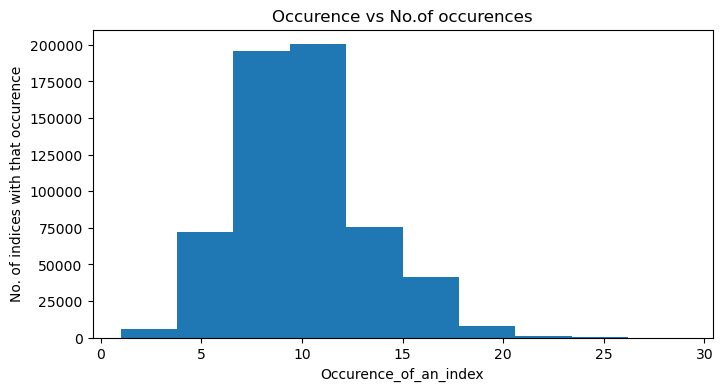

In [22]:
plt.figure(figsize=(8,4))
plt.hist(value_count_dist['count'])
plt.xlabel('Occurence_of_an_index')
plt.ylabel('No. of indices with that occurence')
plt.title('Occurence vs No.of occurences')

In [23]:
stats = value_count_dist['count'].describe(percentiles=[0.01*i for i in range(1,101)])

In [24]:
stats.to_frame().to_csv('index_percentiles.csv',index=True)

In [25]:
stats

count    599968.000000
mean         10.005867
std           3.162288
min           1.000000
1%            3.000000
             ...      
97%          16.000000
98%          17.000000
99%          18.000000
100%         29.000000
max          29.000000
Name: count, Length: 105, dtype: float64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools



# flatten a list of lists
def flatten_list(nested_list):
    return list(itertools.chain.from_iterable(nested_list))


def group_indices_by_task(indices, task_size=60000):
    tasks = []
    for idx in indices: # indices is flattened list contains all indices of that epoch
        task = idx // task_size 
        tasks.append(task)
    return tasks # [0,0,0,0,0,0,...........0,0,1,1]


def plot_task_distribution(tasks, epoch):
    task_counter = Counter(tasks) # {0:n0, 1:n1.....}
    tasks_labels = np.arange(10)
    
    # Ensure all task labels are present in task_counter with value 0 if missing
    task_counter = {task_id: task_counter.get(task_id, 0) for task_id in tasks_labels}
    task_labels = sorted(task_counter.keys()) 
    task_freqs = [task_counter[task] for task in task_labels]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=task_labels, y=task_freqs)
    plt.title(f'Task Distribution - Epoch {epoch}')
    plt.xlabel('Task')
    plt.ylabel('Frequency')
    plt.show()

In [20]:
Counter([0,0,0,0,1,1,1])

Counter({0: 4, 1: 3})

In [22]:
sorted(Counter([0,0,0,0,1,1,1]).keys())

[0, 1]

### **Probs over iterations as a reference**

In [ ]:
beta = 4
task_ids = np.arange(10)
print(f" Current beta : {beta}")

tasks_lst_beta_4 = []
for task_id in task_ids:
    start, peak_start, peak_end, end = _create_task_probs(task_id=task_id, beta= beta)
    tasks_lst_beta_4.append((start, peak_start, peak_end, end))
    print(f" start {start}, peak_start { peak_start}, peak_end {peak_end}, end {end} overall existence {end-start} peak peroid {peak_end-peak_start}")


 Current beta : 4
 start 0, peak_start 1172, peak_end 3517, end 5862 overall existence 5862 peak peroid 2345
 start 3517, peak_start 5862, peak_end 8207, end 10552 overall existence 7035 peak peroid 2345
 start 8207, peak_start 10552, peak_end 12897, end 15242 overall existence 7035 peak peroid 2345
 start 12897, peak_start 15242, peak_end 17587, end 19932 overall existence 7035 peak peroid 2345
 start 17587, peak_start 19932, peak_end 22277, end 24622 overall existence 7035 peak peroid 2345
 start 22277, peak_start 24622, peak_end 26967, end 29312 overall existence 7035 peak peroid 2345
 start 26967, peak_start 29312, peak_end 31657, end 34002 overall existence 7035 peak peroid 2345
 start 31657, peak_start 34002, peak_end 36347, end 38692 overall existence 7035 peak peroid 2345
 start 36347, peak_start 38692, peak_end 41037, end 43382 overall existence 7035 peak peroid 2345
 start 41037, peak_start 43382, peak_end 45727, end 46900 overall existence 5863 peak peroid 2345


In [26]:
[469*i for i in range(1,101)]

[469,
 938,
 1407,
 1876,
 2345,
 2814,
 3283,
 3752,
 4221,
 4690,
 5159,
 5628,
 6097,
 6566,
 7035,
 7504,
 7973,
 8442,
 8911,
 9380,
 9849,
 10318,
 10787,
 11256,
 11725,
 12194,
 12663,
 13132,
 13601,
 14070,
 14539,
 15008,
 15477,
 15946,
 16415,
 16884,
 17353,
 17822,
 18291,
 18760,
 19229,
 19698,
 20167,
 20636,
 21105,
 21574,
 22043,
 22512,
 22981,
 23450,
 23919,
 24388,
 24857,
 25326,
 25795,
 26264,
 26733,
 27202,
 27671,
 28140,
 28609,
 29078,
 29547,
 30016,
 30485,
 30954,
 31423,
 31892,
 32361,
 32830,
 33299,
 33768,
 34237,
 34706,
 35175,
 35644,
 36113,
 36582,
 37051,
 37520,
 37989,
 38458,
 38927,
 39396,
 39865,
 40334,
 40803,
 41272,
 41741,
 42210,
 42679,
 43148,
 43617,
 44086,
 44555,
 45024,
 45493,
 45962,
 46431,
 46900]

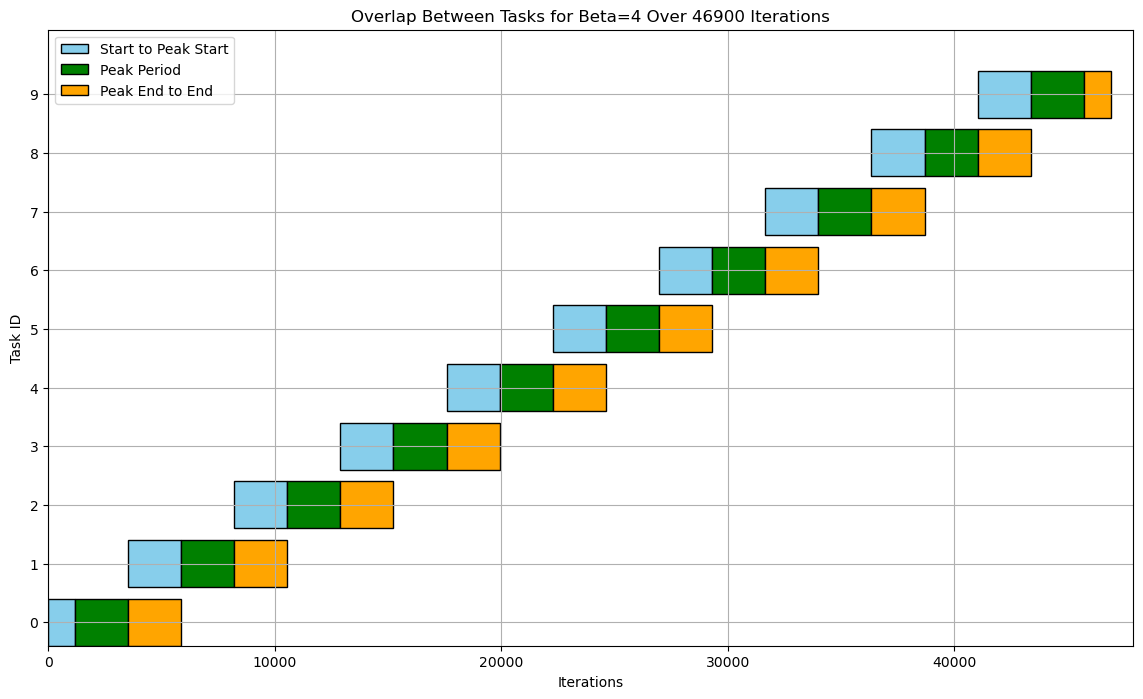

In [ ]:
plot_tasks_data_with_beta(tasks_lst_beta_4, 4) 

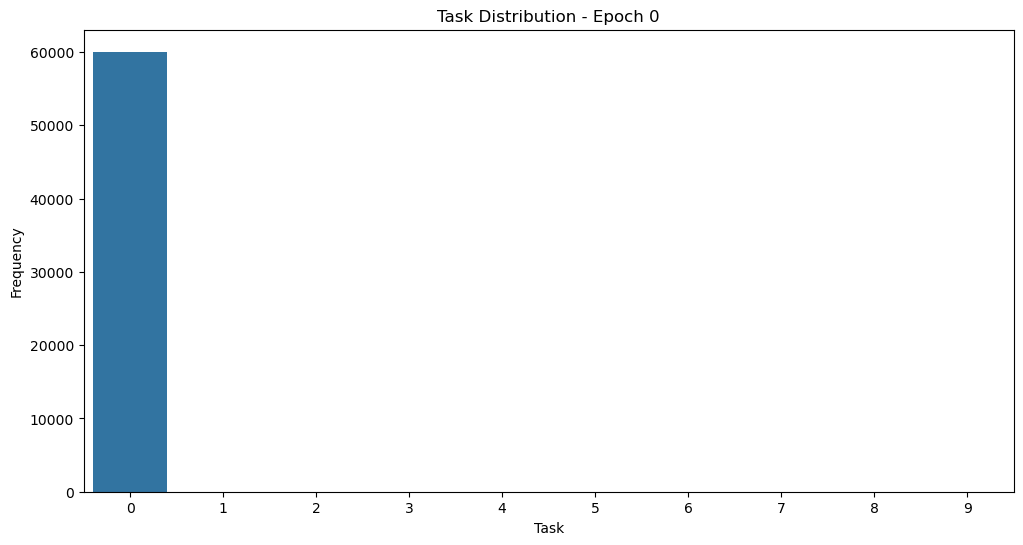

In [46]:
epoch_indices = flatten_list(literal_eval(sample_df.loc[0,'Indices']))
epoch_tasks = group_indices_by_task(epoch_indices)
plot_task_distribution(epoch_tasks, 0) 

In [40]:
np.array(literal_eval(sample_df.loc[1,'Indices'])[-469:]).shape

(469, 128)

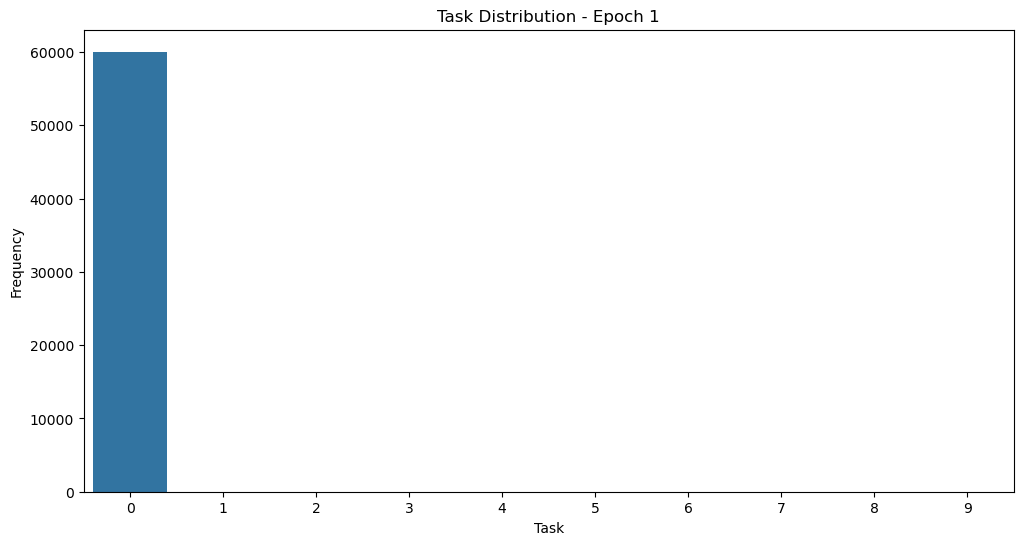

In [47]:
epoch_indices = flatten_list(literal_eval(sample_df.loc[1,'Indices'])[-469:])
epoch_tasks = group_indices_by_task(epoch_indices)
plot_task_distribution(epoch_tasks, 1) 

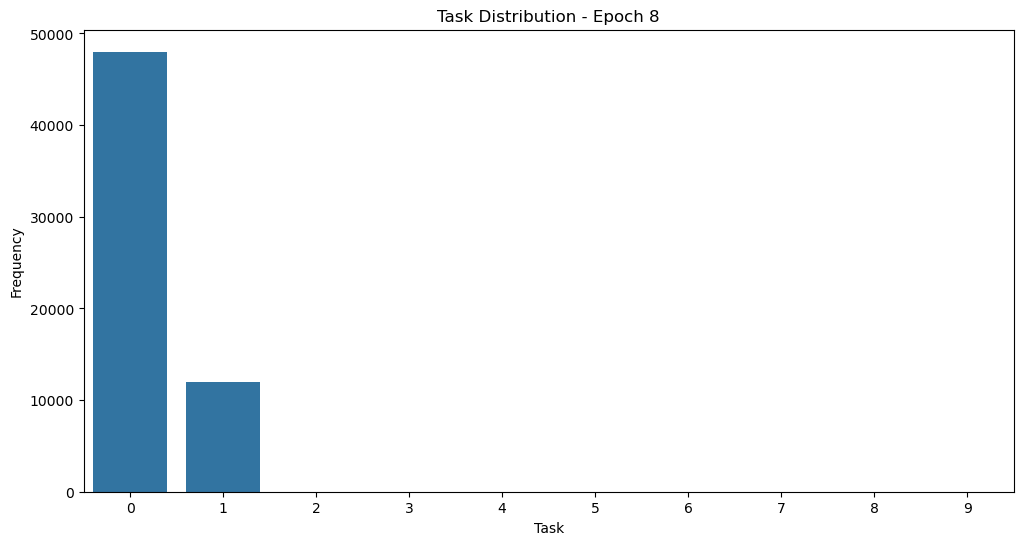

In [48]:
epoch_indices = flatten_list(literal_eval(sample_df.loc[8,'Indices'])[-469:])
epoch_tasks = group_indices_by_task(epoch_indices)
plot_task_distribution(epoch_tasks, 8) 

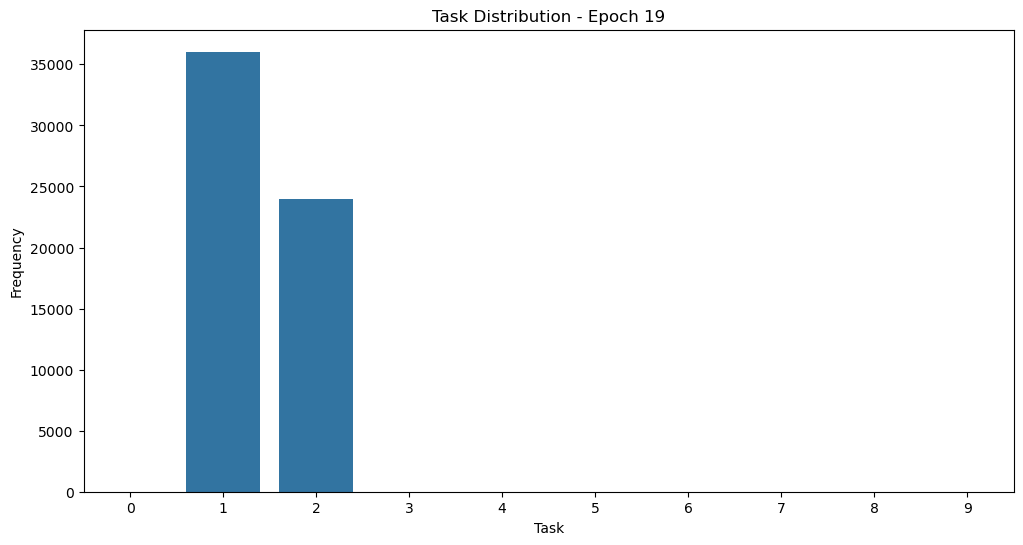

In [49]:
epoch_indices = flatten_list(literal_eval(sample_df.loc[19,'Indices'])[-469:])
epoch_tasks = group_indices_by_task(epoch_indices)
plot_task_distribution(epoch_tasks, 19)

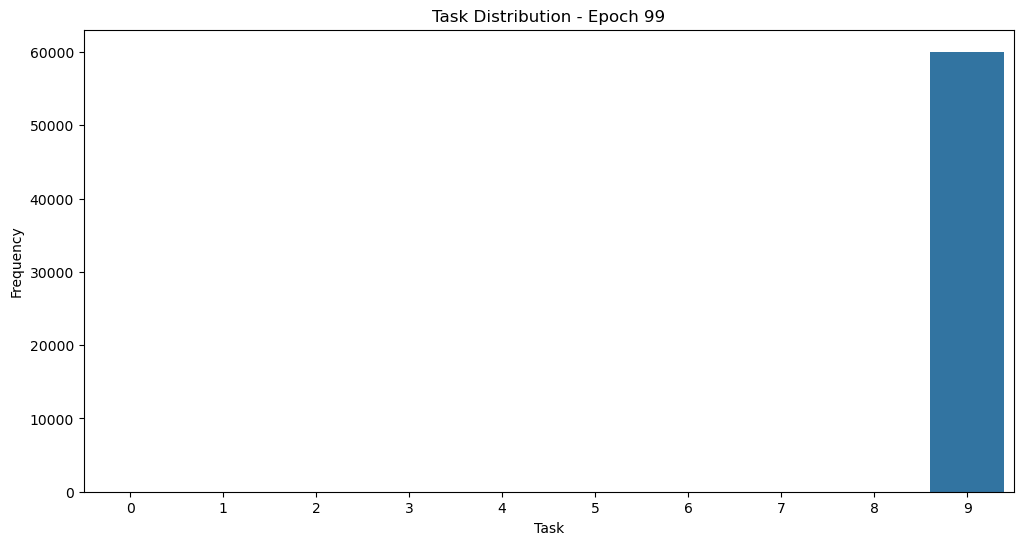

In [50]:
epoch_indices = flatten_list(literal_eval(sample_df.loc[99,'Indices'])[-469:])
epoch_tasks = group_indices_by_task(epoch_indices)
plot_task_distribution(epoch_tasks, 99)

In [10]:
len(train_loaders)

1

In [11]:
train_loaders[0]

+  len method in sampler -> len(self.samples_in_batch)

In [12]:
len(train_loaders[0]) # len method in sampler -> len(self.samples_in_batch)

TypeError: object of type 'int' has no len()

+  len method in sampler -> self.samples_in_batch

In [19]:
len(train_loaders[0])

1

+  len method in sampler -> len(self.data_source)

In [26]:
len(train_loaders[0])

4688

In [27]:
len(iter(train_loaders[0]))

4688

In [29]:
len(train_loaders[0].dataset)

600000

In [ ]:
import torch


input = torch.randn(128, 1, 28, 28)

input.view(-1, 784)

In [24]:
len(train_loaders[0].dataset)

600000

In [27]:
images, labels = next(iter(train_loaders[0]))

In [29]:
images.shape

torch.Size([128, 1, 28, 28])

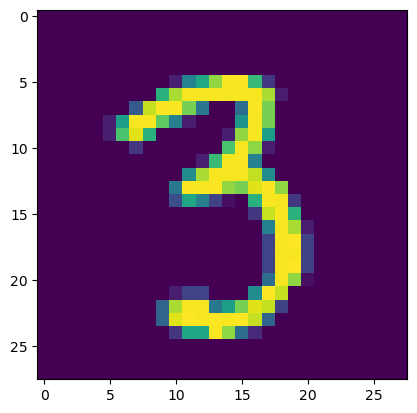

In [31]:
import matplotlib.pyplot as plt

plt.imshow(images[0].squeeze(0)) 

+ The Accuracy Comparison plots with ewc_model and bgd_model

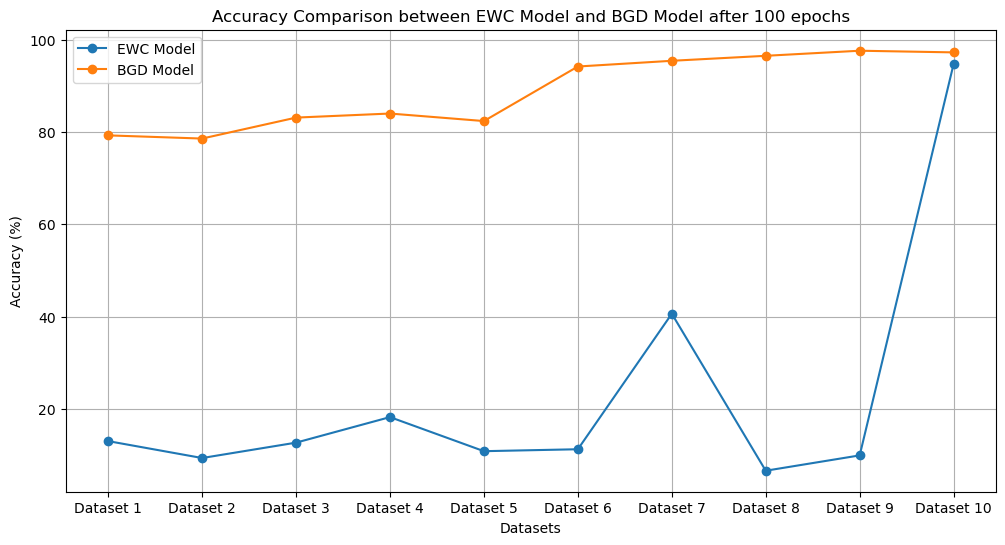

In [3]:
import matplotlib.pyplot as plt


datasets = [f'Dataset {i+1}' for i in range(10)]
ewc_accuracy = [13.05, 9.39, 12.72, 18.25, 10.87, 11.29, 40.63, 6.64, 9.96, 94.72]
bgd_accuracy = [79.25, 78.56, 83.10, 83.98, 82.35, 94.16, 95.40, 96.48, 97.58, 97.22]


plt.figure(figsize=(12, 6))
plt.plot(datasets, ewc_accuracy, marker='o', label='EWC Model')
plt.plot(datasets, bgd_accuracy, marker='o', label='BGD Model')
plt.xlabel('Datasets')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison between EWC Model and BGD Model after 100 epochs')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
import re

def get_accuracy_from_log(log_file_path):

    # Define the path to your log file
    log_file_path = log_file_path

    # Pattern to match the lines reporting the average accuracy over all tasks
    pattern = re.compile(r'Average accuracy over all tasks for epoch number (\d+) for dataset idx \d+ using map is (\d+\.\d+)')

    # Extracting the average accuracies
    accuracy = []

    with open(log_file_path, 'r') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                epoch_number = int(match.group(1))
                avg_accuracy = float(match.group(2))
                
                # Check if it's a 10th epoch
                if epoch_number % 10 == 0:
                    accuracy.append((epoch_number, avg_accuracy))

    print(accuracy)
    return accuracy


In [27]:
bgd_log_file = '/home/gayam22139/BGD_FL/bgd_new/logs/exp_1_with_mnist_simple_net/continuous_permuted_mnist_10tasks-06-11_17-05-53.txt'
ewc_log_file = '/home/gayam22139/BGD_FL/bgd_new/logs/exp_2_with_custom_cnn_map/continuous_permuted_mnist_10tasks-06-11_16-21-01.txt'
bgd_epoch_acc_list = get_accuracy_from_log(bgd_log_file)
ewc_epoch_acc_list = get_accuracy_from_log(ewc_log_file)

[(10, 27.470000000000013), (20, 36.34299999999998), (30, 45.168), (40, 53.12100000000001), (50, 62.03099999999999), (60, 69.79899999999999), (70, 77.762), (80, 84.13999999999999), (90, 90.42699999999999), (100, 88.80800000000002)]
[(10, 19.047000000000004), (20, 19.62), (30, 23.996000000000002), (40, 23.753999999999998), (50, 22.091000000000005), (60, 26.90300000000001), (70, 23.250000000000004), (80, 20.730999999999995), (90, 23.996000000000002), (100, 22.752000000000002)]


In [39]:
[f'Epoch {i+10}' for i in range(0, 100, 10)]

['Epoch 10',
 'Epoch 20',
 'Epoch 30',
 'Epoch 40',
 'Epoch 50',
 'Epoch 60',
 'Epoch 70',
 'Epoch 80',
 'Epoch 90',
 'Epoch 100']

[19.047000000000004, 19.62, 23.996000000000002, 23.753999999999998, 22.091000000000005, 26.90300000000001, 23.250000000000004, 20.730999999999995, 23.996000000000002, 22.752000000000002]
[27.470000000000013, 36.34299999999998, 45.168, 53.12100000000001, 62.03099999999999, 69.79899999999999, 77.762, 84.13999999999999, 90.42699999999999, 88.80800000000002]


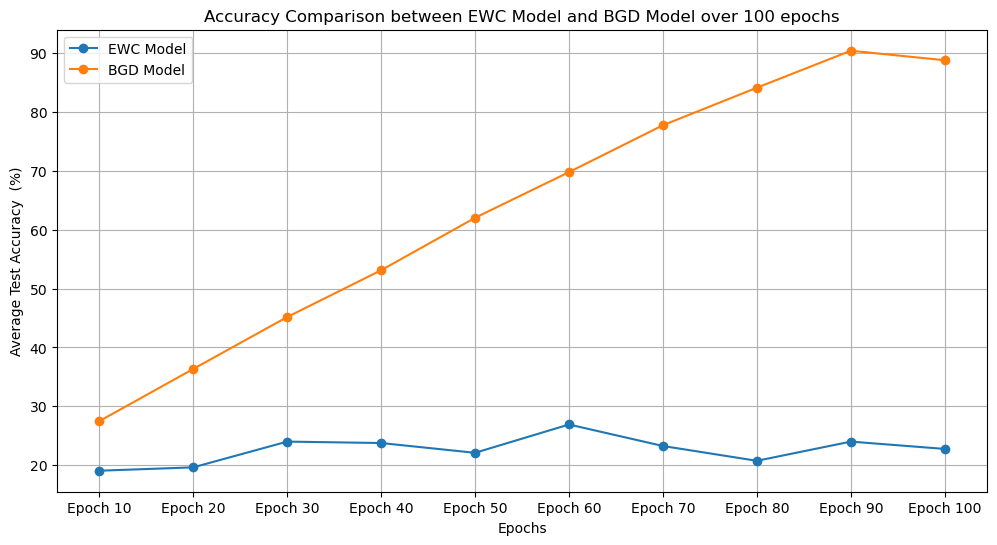

In [43]:
import matplotlib.pyplot as plt


datasets = [f'Epoch {i+10}' for i in range(0, 100, 10)]
ewc_accuracy_lst = [item[1] for item in ewc_epoch_acc_list]
bgd_accuracy_lst = [item[1] for item in bgd_epoch_acc_list]

print(ewc_accuracy_lst)
print(bgd_accuracy_lst)

plt.figure(figsize=(12, 6))
plt.plot(datasets, ewc_accuracy_lst, marker='o', label='EWC Model')
plt.plot(datasets, bgd_accuracy_lst, marker='o', label='BGD Model')
plt.xlabel('Epochs')
plt.ylabel('Average Test Accuracy  (%)')
plt.title('Accuracy Comparison between EWC Model and BGD Model over 100 epochs')
plt.legend()
plt.grid(True)
plt.show() 

+ Model Summary

In [6]:
from torchsummary import summary
import torch.nn.functional as func
import torch.nn as nn

class FC2Layers(nn.Module):
    def __init__(self, **kwargs):
        super(FC2Layers, self).__init__()
        layer1_width = kwargs.get("layer1_width", 400)
        layer2_width = kwargs.get("layer2_width", 400)

        self.ds_idx = 0
        self.num_of_datasets = kwargs.get("num_of_datasets", 1)
        self.num_of_classes = kwargs.get("num_of_classes", 10)
        self.input_size = kwargs.get("input_size", 784)

        self.layer1 = nn.Sequential(nn.Linear(self.input_size, layer1_width))
        self.layer2 = nn.Sequential(nn.Linear(layer1_width, layer2_width))
        self.last_layer = nn.ModuleList([nn.Linear(layer2_width, self.num_of_classes)
                                         for _ in range(0, self.num_of_datasets)])

    def set_dataset(self, ds_idx):
        self.ds_idx = ds_idx % self.num_of_datasets

    def forward(self, x):
        # print(f"Input shape: {x.shape}")
        x = x.view(-1, self.input_size)  # [128, 784]
        # print(f"Shape after view: {x.shape}")

        out = self.layer1(x)
        # print(f"Shape after layer1: {out.shape}")
        out = func.relu(out)
        # print(f"Shape after ReLU 1: {out.shape}")

        out = self.layer2(out)
        # print(f"Shape after layer2: {out.shape}")
        out = func.relu(out)
        # print(f"Shape after ReLU 2: {out.shape}")

        out = self.last_layer[self.ds_idx](out)
        # print(f"Shape after last layer: {out.shape}")

        return out



In [10]:
def mnist_simple_net_200width_domainlearning_784input_10cls_1ds(**kwargs): # use this
    return FC2Layers(input_size=784, layer1_width=200, layer2_width=200, num_of_datasets=1,
                     num_of_classes=10, **kwargs)

model = mnist_simple_net_200width_domainlearning_784input_10cls_1ds() 

In [12]:
summary(model, input_size=(1, 784)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 200]         157,000
            Linear-2                  [-1, 200]          40,200
            Linear-3                   [-1, 10]           2,010
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.76
Estimated Total Size (MB): 0.77
----------------------------------------------------------------


+ ewc model

In [21]:
import torch

class MNIST_CNN(nn.Module):
  """
  CNN with two 5x5 convolution lauers(the first with 32 channels, second with 64,
  each followed with 2x2 max pooling), a fully connected layer with 512 uunits and 
  ReLu activation, and the final Softmax output layer

  Total Expected Params: 1,663,370
  """
  def __init__(self,**kwargs):
    super(MNIST_CNN, self).__init__()

    self.ds_idx = 0

    self.num_of_datasets = kwargs.get("num_of_datasets", 3)
    self.num_of_classes = kwargs.get("num_of_classes", 10)

    self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
    
    self.pool = nn.MaxPool2d(2,2)
    self.dropout = nn.Dropout(p=0.2)

    self.fc1 = nn.Linear(1024, 512)
    # self.out = nn.Linear(512, 10)
    self.last_layer = nn.ModuleList([nn.Linear(512,self.num_of_classes) for _ in range(self.num_of_datasets)])

  def set_dataset(self, ds_idx):
    self.ds_idx = ds_idx % self.num_of_datasets


  def forward(self, x):
    x = self.pool(func.relu(self.conv1(x)))
    x = self.pool(func.relu(self.conv2(x)))
    x = self.dropout(x)
    x = torch.flatten(x, 1)
    x = func.relu(self.fc1(x))
    x = self.last_layer[self.ds_idx](x)
    out = func.log_softmax(x, dim=1)

    return out

In [22]:
def custom_cnn(**kwargs):
  return MNIST_CNN(**kwargs)

In [23]:
model_ewc = custom_cnn( num_of_datasets=1, num_of_classes=10)

In [24]:
summary(model_ewc, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 24, 24]             832
         MaxPool2d-2           [-1, 32, 12, 12]               0
            Conv2d-3             [-1, 64, 8, 8]          51,264
         MaxPool2d-4             [-1, 64, 4, 4]               0
           Dropout-5             [-1, 64, 4, 4]               0
            Linear-6                  [-1, 512]         524,800
            Linear-7                   [-1, 10]           5,130
Total params: 582,026
Trainable params: 582,026
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.23
Params size (MB): 2.22
Estimated Total Size (MB): 2.45
----------------------------------------------------------------


In [2]:
import numpy as np

lst = list(np.arange(10))

lst

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [3]:
lst_iter = iter(lst)

In [4]:
for ele in lst_iter:
    print(ele)

0
1
2
3
4
5
6
7
8
9
